In [1]:
from pathlib import Path

from gemdat import SitesData, Trajectory, plots

/nix/store/invvsgaay75cr6pikaycfi3lbgqxqgjn-python3.11-tqdm-4.64.1/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vikko/local_projects/GEMDAT/.venv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
# Get our trajectory
trajectory = Trajectory.from_vasprun(Path('../../example/vasprun.xml'))

# Create a new trajectory object that only consists of Lithium
diff_trajectory = trajectory.filter('Li')
diff_trajectory.__str__()

'<gemdat.trajectory.Trajectory object at 0x7fdbbd634e90>'

### Converting a Trajectory to a Volume

To convert a `Trajectory` to a Sites object we use the `gemdat.volume.trajectory_to_volume` function provided by gemdat. This function converts a Trajectory to a Volume, a volume in this context is a discretized version of the volume, in which each point in the trajectory is assigned to a bin, and the number of points in bins is counted.

In [3]:
# Lets create a volume from our trajectory of diffusive elements
from gemdat.volume import trajectory_to_volume

# Resolution is the minimum size of the voxels in Angstrom
diff_volume = trajectory_to_volume(diff_trajectory, resolution=0.2)

### Converting a Volume to Sites

We can directly convert a volume to a structure with the  `Volume.to_structure` method. This uses a [watershed](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html) algorithm to find the sites.

various helper functions are available to the Volume object that can be used for various purposes [gemdat.Volume API](https://gemdat.readthedocs.io/en/latest/api/gemdat_volume/), for example finding peaks or converting a Volume to a vasp file

In [4]:
# Now convert it to a structure
structure = diff_volume.to_structure(specie='Li', background_level=0.1)

print("\n".join(
    structure.__repr__().split('\n')[:20]))  # only print the first 20 lines

Structure Summary
Lattice
    abc : 19.873726186669696 9.919447462770213 9.916453611751622
 angles : 90.2141142206055 90.85913455159614 89.95047426162805
 volume : 1954.6597409551687
      A : 19.87317911 0.0062081 -0.14732978
      B : 0.0053182 9.91942326 -0.02125729
      C : -0.0751747 -0.01576718 9.91615613
    pbc : True True True
PeriodicSite: Li (4.763, 2.333, 2.829) [0.2407, 0.2355, 0.2893]
PeriodicSite: Li (4.816, 3.116, 1.963) [0.243, 0.3143, 0.2022]
PeriodicSite: Li (7.0, 0.4973, 6.857) [0.3549, 0.05102, 0.6969]
PeriodicSite: Li (7.852, 0.4839, 7.825) [0.3981, 0.0498, 0.7952]
PeriodicSite: Li (9.516, 6.173, 2.822) [0.4798, 0.6224, 0.293]
PeriodicSite: Li (9.863, 7.065, 2.998) [0.4973, 0.7125, 0.3112]
PeriodicSite: Li (9.522, 9.21, 2.338) [0.4798, 0.9286, 0.2449]
PeriodicSite: Li (9.791, 8.125, 1.823) [0.4932, 0.8191, 0.1929]
PeriodicSite: Li (5.284, 7.218, 2.013) [0.2665, 0.7278, 0.2085]
PeriodicSite: Li (5.309, 8.046, 2.909) [0.2681, 0.8115, 0.2991]
PeriodicSite: Li (5.794

In [5]:
# Write it to a vasp file for inspection in external tools
diff_volume.to_vasp_volume(structure, filename="/tmp/example.vasp")

In [6]:
del structure.sites[13]
del structure.sites[71]  # These sites overlap with neighbours, so remove them

### Generate the sites from the generated structure
sites = SitesData(
    structure=structure,
    trajectory=trajectory,
    floating_specie='Li',
)

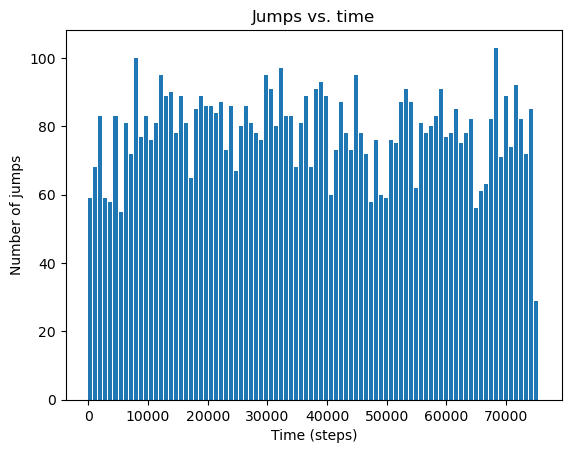

In [7]:
plots.jumps_vs_time(sites=sites, binsize=840);

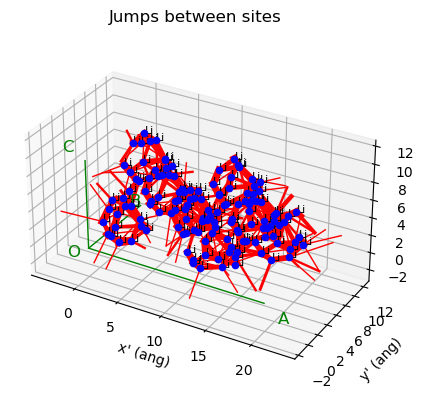

In [8]:
plots.jumps_3d(sites=sites);